In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import squarify 

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No handles with labels found to put in legend.
<ipython-input-209-358e7534e7ec>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe2[column] = dataframe2[column].astype('float64')
<ipython-input-209-358e7534e7ec>:21: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid colu

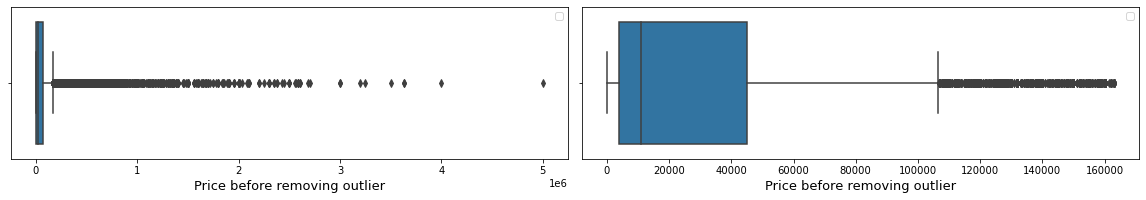

In [209]:
dataframe = pd.read_csv("final_eda.csv")
dataframe = dataframe.rename(columns={'House Direction': 'HouseDirection', 'Balcony Direction': 'BalconyDirection'})
dataframe.head()
dataframe['Facade'].fillna('None', inplace=True)
dataframe['Entrance'].fillna('None', inplace=True)
dataframe['Area'].fillna(dataframe['Area'].mean(), inplace=True)
dataframe['Ward'] = dataframe['Ward'].fillna('None')
dataframe['Street'] = dataframe['Street'].fillna('None')
dataframe.isnull().sum()
a = dataframe[dataframe['District']=="hà nội  long biên"]
dataframe.loc[dataframe['District']=="hà nội  long biên", 'District'] = "long biên" 
fig = plt.figure(figsize=(16,16))
for index, col in enumerate(['Price', 'Price']):
    label = "Price before removing outlier"
    if index==1:
        columns = ['Facade', 'Price', 'Area']
        main_index = []
        for column in columns:
            dataframe2 = dataframe[dataframe[column]!='None']
            dataframe2[column] = dataframe2[column].astype('float64')
            Q1 = dataframe2.quantile(0.25)[column]
            Q3 = dataframe2.quantile(0.75)[column]
            IQR = Q3 - Q1
            indexs = list(dataframe2[dataframe2[column] < Q1 - 1.5 * IQR].index) + list(dataframe2[dataframe2[column] > Q3 + 1.5 * IQR].index)
            main_index += indexs

        indexs = [i for i in range(len(dataframe)) if i not in main_index]
        dataframe = dataframe.iloc[indexs]  
        dataframe.Price.describe()

    plt.subplot(6,2,index+1)
    t = sns.boxplot(x = dataframe['Price'])
    t.set_xlabel(xlabel=label, fontsize=13)
    t.legend()
fig.tight_layout(pad=1.0);

In [210]:
dataframe = pd.read_csv("final_eda.csv")
dataframe = dataframe.rename(columns={'House Direction': 'HouseDirection', 'Balcony Direction': 'BalconyDirection'})
dataframe.head()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,index,HouseDirection,BalconyDirection,Bedrooms,Toilets,Legits,Floors,Facade,Entrance,District,Ward,Street,Area,Price,X,Y
0,0,0,nam,bắc,3,2,None,None,NaN,NaN,tây hồ,phú thượng,none,100.00,4000.000,21.087703,105.804831
1,1,1,nam,bắc,2,2,+đỏ+hồng,None,NaN,NaN,tây hồ,phú thượng,võ chí công,80.74,3496.042,21.087703,105.804831
2,2,2,None,None,3,3,+đỏ+hồng,None,NaN,NaN,cầu giấy,yên hòa,dương đình nghệ,131.00,5900.000,21.018631,105.798636
3,3,3,None,None,5,None,+đỏ+hồng,5,NaN,NaN,long biên,bồ đề,bồ đề,52.00,6750.000,21.038845,105.875416
4,4,4,None,None,3,2,+đỏ+hồng,None,NaN,NaN,nam từ liêm,cầu diễn,hàm nghi,119.00,5800.000,21.034359,105.762291


In [211]:
# Checking the missing values
dataframe.isnull().mean()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0          0.000000
index               0.000000
HouseDirection      0.000000
BalconyDirection    0.000000
Bedrooms            0.000000
Toilets             0.000000
Legits              0.000000
Floors              0.000000
Facade              0.277744
Entrance            0.825985
District            0.000000
Ward                0.000022
Street              0.000000
Area                0.000000
Price               0.000000
X                   0.000000
Y                   0.000000
dtype: float64

In [212]:
# Fill nan
dataframe['Facade'].fillna('None', inplace=True)
dataframe['Entrance'].fillna('None', inplace=True)
dataframe['Area'].fillna('None', inplace=True)
dataframe['Ward'] = dataframe['Ward'].fillna('None')
dataframe['Street'] = dataframe['Street'].fillna('None')
dataframe.isnull().sum()

Unnamed: 0          0
index               0
HouseDirection      0
BalconyDirection    0
Bedrooms            0
Toilets             0
Legits              0
Floors              0
Facade              0
Entrance            0
District            0
Ward                0
Street              0
Area                0
Price               0
X                   0
Y                   0
dtype: int64

In [213]:
# Drop the wrong value
dataframe.loc[dataframe['District']=="hà nội  long biên", 'District'] = "long biên" 

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2919: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  pct = percentile_func(x, rng, axis=axis, interpolation=interpolation,
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use

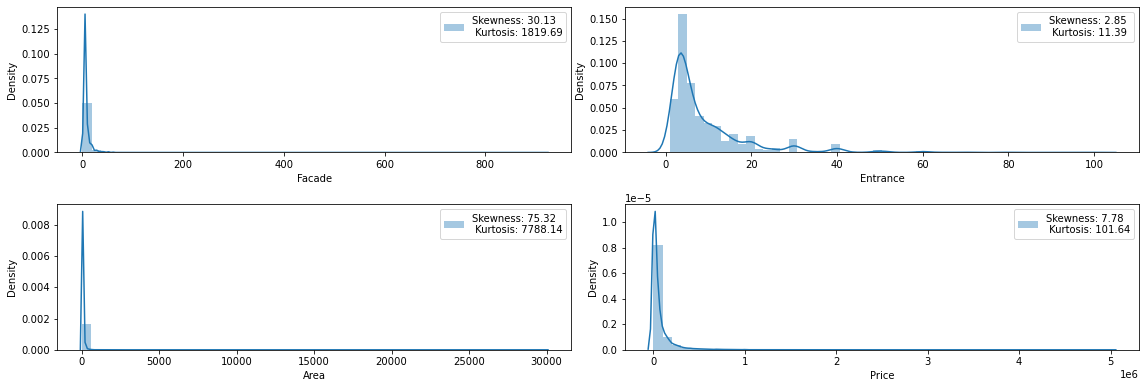

In [214]:
fig = plt.figure(figsize=(16,16))
for index, col in enumerate(['Facade', 'Entrance', 'Area', 'Price']):
    plt.subplot(6,2,index+1)
    t = sns.distplot(dataframe[dataframe[col] != 'None'].loc[:,col], label="Skewness: %.2f \n Kurtosis: %.2f" %(dataframe[dataframe[col] != 'None'].loc[:, col].skew(), dataframe[dataframe[col] != 'None'].loc[:, col].kurt()))
    t.legend()
fig.tight_layout(pad=1.0);

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


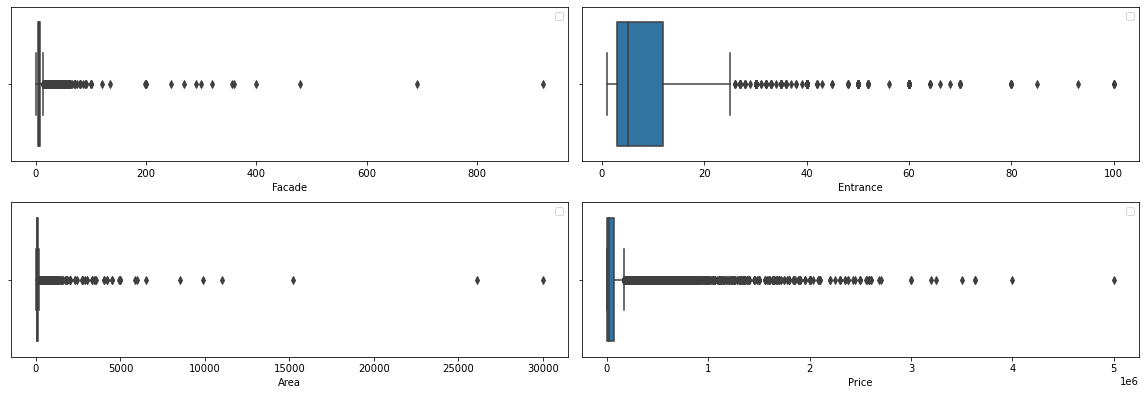

In [215]:
fig = plt.figure(figsize=(16,16))
for index, col in enumerate(['Facade', 'Entrance', 'Area', 'Price']):
    plt.subplot(6,2,index+1)
    t = sns.boxplot(x = dataframe[dataframe[col] != 'None'][col])
    t.legend()
fig.tight_layout(pad=1.0);

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1841: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


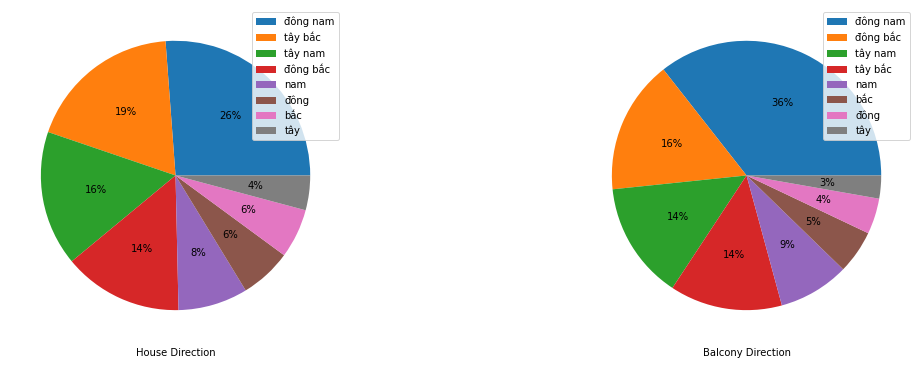

In [216]:
fig = plt.figure(figsize=(16,30))
labels = ["House Direction", "Balcony Direction"]
for index, col in enumerate(["HouseDirection", "BalconyDirection"]):
    plt.subplot(6,2,index+1)
    t = dataframe[dataframe[col]!='None'][col].value_counts(normalize=True).plot(kind='pie', labeldistance=None, autopct="%1.0f%%", legend=True)
    t.set_xlabel(labels[index])
    t.set_ylabel("")
    t.legend()
fig.tight_layout(pad=1.0);

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-217-8d4061eb1f93>:5: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  tick.label.set_fontsize(10)


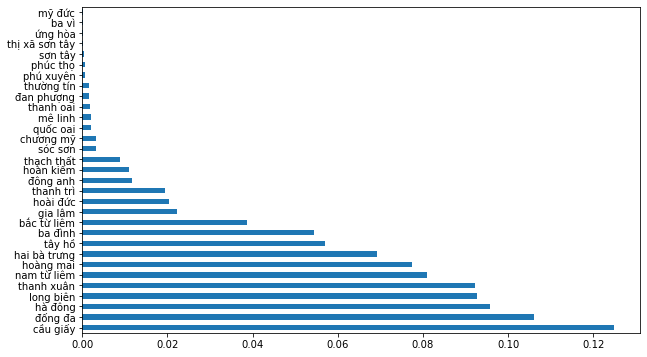

In [217]:
plt.figure(figsize=(10,6))
dataframe[dataframe['District']!='None'].District.value_counts(normalize=True).plot.barh()
ax = plt.gca()
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-218-336f27a3f107>:8: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  tick.label.set_fontsize(10)


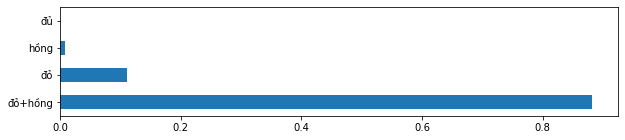

In [218]:
plt.figure(figsize=(10,2))
dataframe['Legits'] = dataframe['Legits'].replace(['+đỏ'], 'đỏ')
dataframe['Legits'] = dataframe['Legits'].replace(['+hồng'], 'hồng')
dataframe['Legits'] = dataframe['Legits'].replace(['+đỏ+hồng'], 'đỏ+hồng')
dataframe[dataframe['Legits']!='None'].Legits.value_counts(normalize=True).plot.barh()
ax = plt.gca()
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


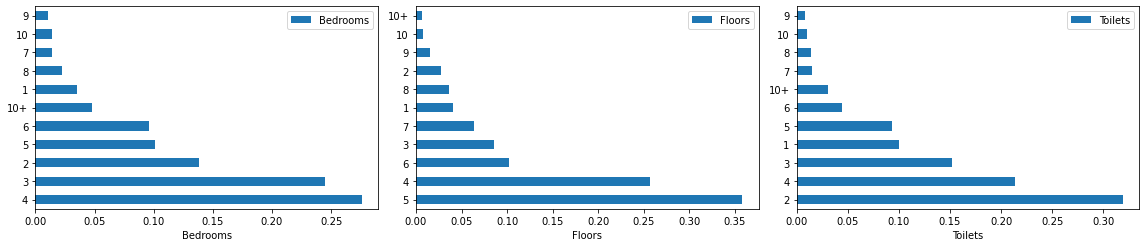

In [219]:
fig = plt.figure(figsize=(16,20))
labels = ["Bedrooms", "Floors", "Toilets"]
for index, col in enumerate(labels):
    plt.subplot(6,3,index+1)
    t = dataframe[dataframe[col]!='None'][col].value_counts(normalize=True).plot.barh()
    t.set_xlabel(labels[index])
    t.set_ylabel("")
    t.legend()
fig.tight_layout(pad=1.0);

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


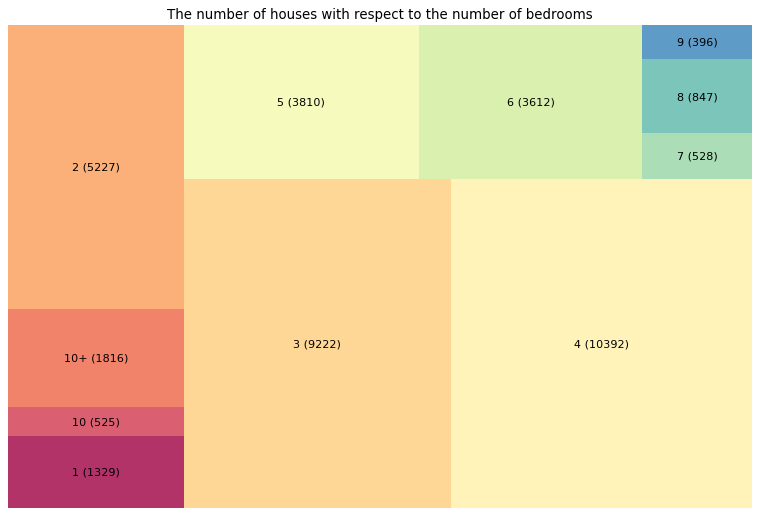

In [220]:
bedroom = dataframe[dataframe['Bedrooms']!='None']
bedroom=bedroom.groupby('Bedrooms').size().reset_index(name='counts')
labels = bedroom.apply(lambda x: str(x[0]) + " (" + str(x[1]) + ")", axis=1)
sizes = bedroom['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
plt.title('The number of houses with respect to the number of bedrooms')
plt.axis('off')
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


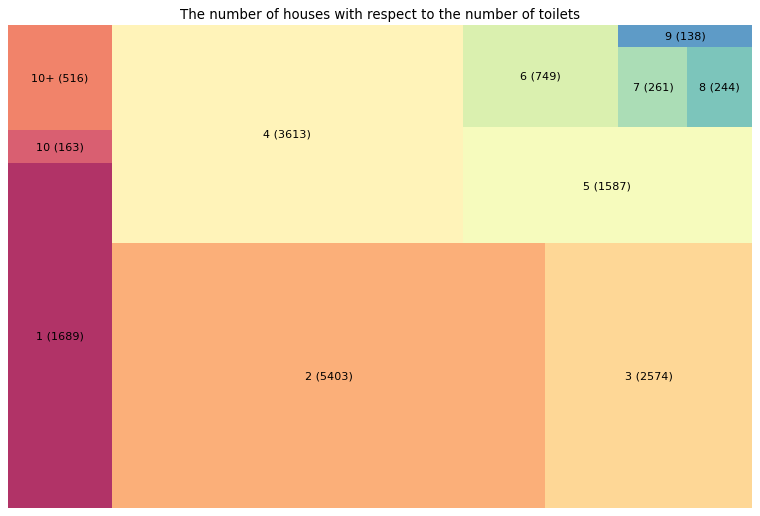

In [221]:
toilet = dataframe[dataframe['Toilets']!='None']
toilet=toilet.groupby('Toilets').size().reset_index(name='counts')
labels = toilet.apply(lambda x: str(x[0]) + " (" + str(x[1]) + ")", axis=1)
sizes = toilet['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
plt.title('The number of houses with respect to the number of toilets')
plt.axis('off')
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


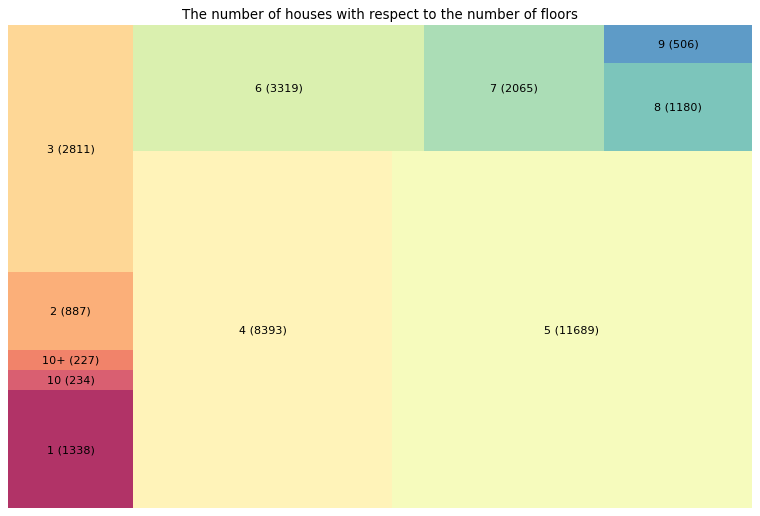

In [222]:
floor = dataframe[dataframe['Floors']!='None']
floor=floor.groupby('Floors').size().reset_index(name='counts')
labels = floor.apply(lambda x: str(x[0]) + " (" + str(x[1]) + ")", axis=1)
sizes = floor['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
plt.title('The number of houses with respect to the number of floors')
plt.axis('off')
plt.show()

In [223]:
columns = ['Facade', 'Price', 'Area']
main_index = []
for column in columns:
    dataframe2 = dataframe[dataframe[column]!='None']
    dataframe2[column] = dataframe2[column].astype('float64')
    Q1 = dataframe2.quantile(0.25)[column]
    Q3 = dataframe2.quantile(0.75)[column]
    IQR = Q3 - Q1
    index = list(dataframe2[dataframe2[column] < Q1 - 1.5 * IQR].index) + list(dataframe2[dataframe2[column] > Q3 + 1.5 * IQR].index)
    main_index += index

index = [i for i in range(len(dataframe)) if i not in main_index]
dataframe = dataframe.iloc[index]  
dataframe.Price.describe()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-223-599ca66c461e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe2[column] = dataframe2[column].astype('float64')
<ipython-input-223-599ca66c461e>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silen

count     38367.000000
mean      29680.538231
std       36869.959466
min          14.000000
25%        3900.000000
50%       11000.000000
75%       45000.000000
max      163000.000000
Name: Price, dtype: float64

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


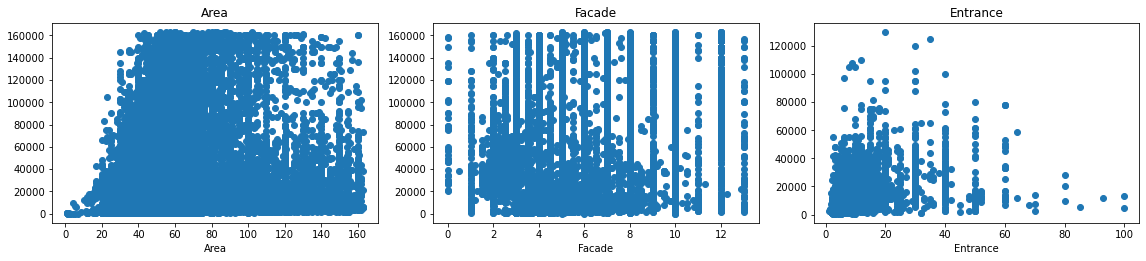

In [224]:
fig = plt.figure(figsize=(16,20))
labels = ["Area", "Facade", "Entrance"]
for index, col in enumerate(labels):
    plt.subplot(6,3,index+1)
    dataframe2 = dataframe[dataframe[col]!="None"]
    plt.scatter(dataframe2[col], dataframe2.Price)
    plt.xlabel(labels[index])
    plt.ylabel("")
    plt.title(labels[index])
fig.tight_layout(pad=1.0);

<ipython-input-225-e42866a49f8f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bedroom_price = bedroom_price[dataframe['Bedrooms']!='10+']
<ipython-input-225-e42866a49f8f>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(bedroom_price['Bedrooms'], rotation=60, horizontalalignment= 'right')


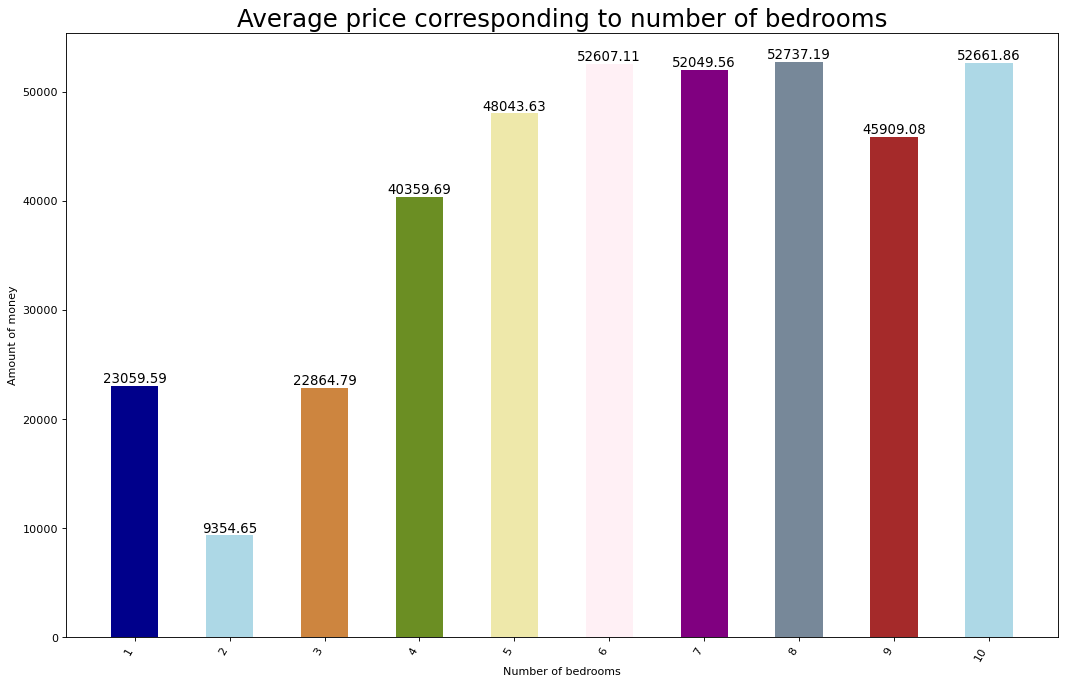

In [225]:
bedroom_price = dataframe[dataframe['Bedrooms']!='None']
bedroom_price = bedroom_price[dataframe['Bedrooms']!='10+']
bedroom_price = bedroom_price.groupby('Bedrooms')
bedroom_price = bedroom_price['Price'].mean().reset_index(name='Amount of money')
bedroom_price['order'] = bedroom_price['Bedrooms'].apply(lambda x: int(x))
bedroom_price = bedroom_price.sort_values(by = 'order') 
bedroom_price['Amount of money'] = bedroom_price['Amount of money'].apply(lambda x : round(x, 2))
n = bedroom_price['Bedrooms'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(bedroom_price['Bedrooms'], bedroom_price['Amount of money'], color=c, width=.5)
for i, val in enumerate(bedroom_price['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.gca().set_xticklabels(bedroom_price['Bedrooms'], rotation=60, horizontalalignment= 'right')
plt.title("Average price corresponding to number of bedrooms", fontsize=22)
plt.ylabel('Amount of money')
plt.xlabel("Number of bedrooms")
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-226-43904a8da252>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  toilet = toilet[dataframe['Toilets']!='10+']
<ipython-input-226-43904a8da252>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(toilet['Toilets'], rotation=60, horizontalalignment= 'right')


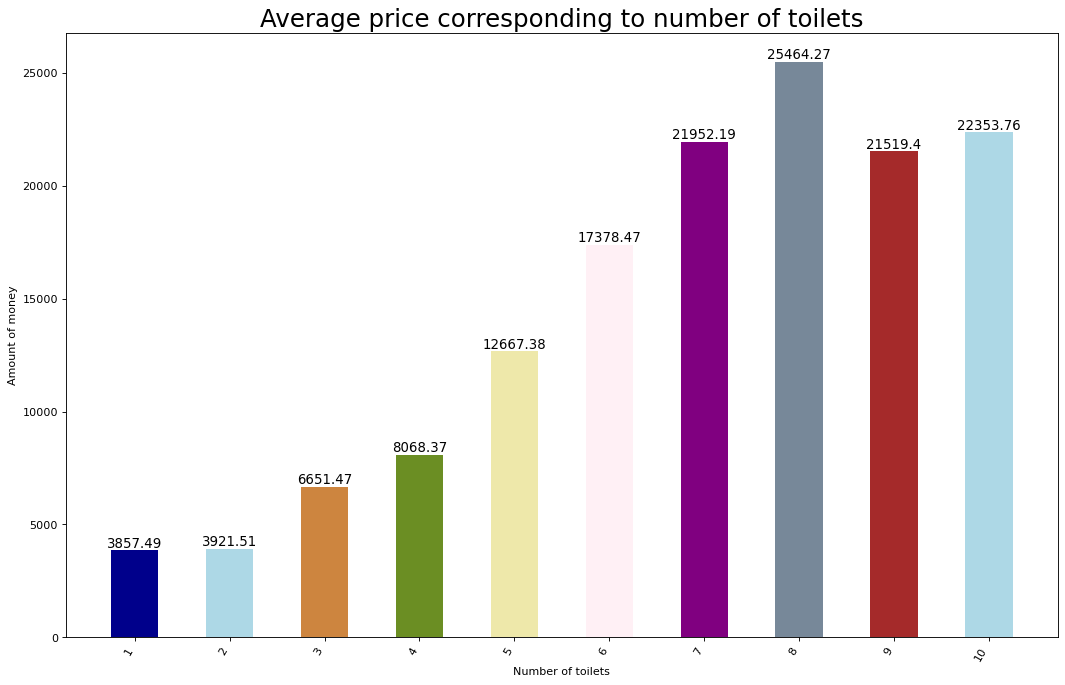

In [226]:
toilet = dataframe[dataframe['Toilets']!='None']
toilet = toilet[dataframe['Toilets']!='10+']
toilet = toilet.groupby('Toilets')['Price'].mean().reset_index(name='Amount of money')
toilet['order'] = toilet['Toilets'].apply(lambda x: int(x))
toilet= toilet.sort_values(by = 'order') 
toilet['Amount of money'] = toilet['Amount of money'].apply(lambda x : round(x, 2))
n = toilet['Toilets'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(toilet['Toilets'], toilet['Amount of money'], color=c, width=.5)
for i, val in enumerate(toilet['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.gca().set_xticklabels(toilet['Toilets'], rotation=60, horizontalalignment= 'right')
plt.title("Average price corresponding to number of toilets", fontsize=22)
plt.ylabel('Amount of money')
plt.xlabel("Number of toilets")
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-227-354b8925023a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dftmp.copy().corr(), xticklabels=dftmp.corr().columns, yticklabels=dftmp.corr().columns, cmap='RdYlGn', center=0, annot=True)


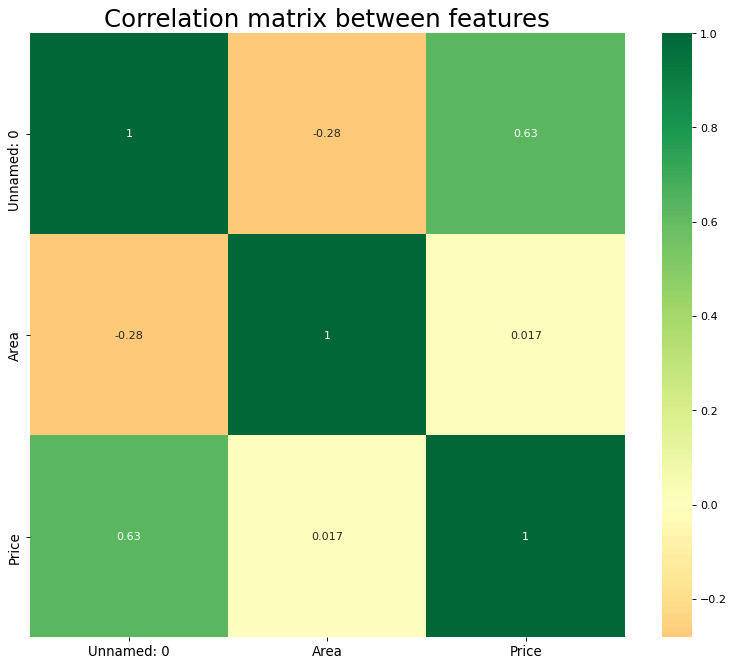

In [227]:
plt.figure(figsize=(12,10), dpi= 80)
dftmp = dataframe.drop(['index', 'X', 'Y'], axis=1)
sns.heatmap(dftmp.copy().corr(), xticklabels=dftmp.corr().columns, yticklabels=dftmp.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlation matrix between features', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


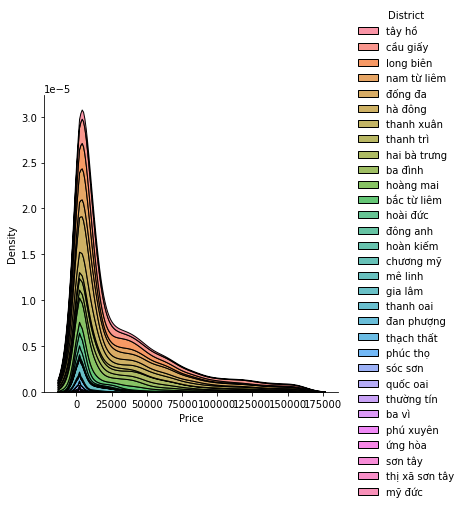

In [228]:
district = dataframe.copy()
sns.displot(district, x="Price", hue="District", kind="kde", multiple="stack")

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-229-f875f7cca530>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(district_price['District'], rotation=60, horizontalalignment= 'right')


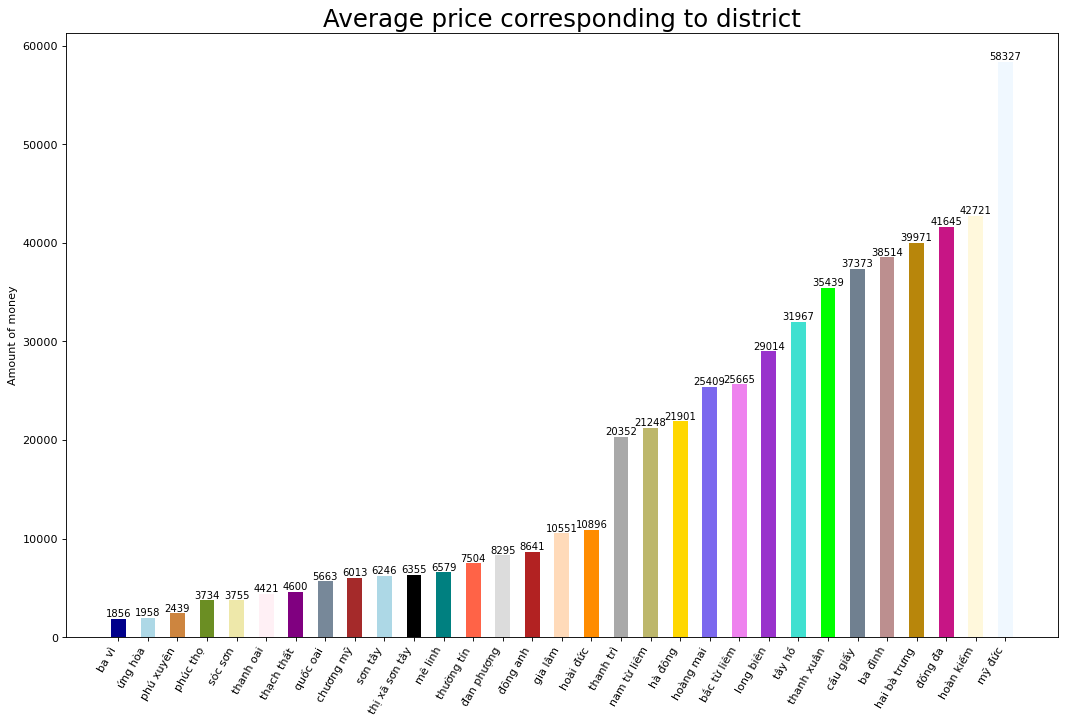

In [229]:
district_price = dataframe[dataframe['District']!='None']
district_price = district_price.groupby('District')['Price'].mean().reset_index(name='Amount of money')
district_price = district_price.sort_values(by = 'Amount of money') 
district_price['Amount of money'] = district_price['Amount of money'].apply(lambda x : int(x))
n = district_price['District'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(district_price['District'], district_price['Amount of money'], color=c, width=.5)
for i, val in enumerate(district_price['Amount of money'].values):
    plt.text(i, val, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
plt.gca().set_xticklabels(district_price['District'], rotation=60, horizontalalignment= 'right')
plt.title("Average price corresponding to district", fontsize=22)
plt.ylabel('Amount of money')
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 800x640 with 0 Axes>

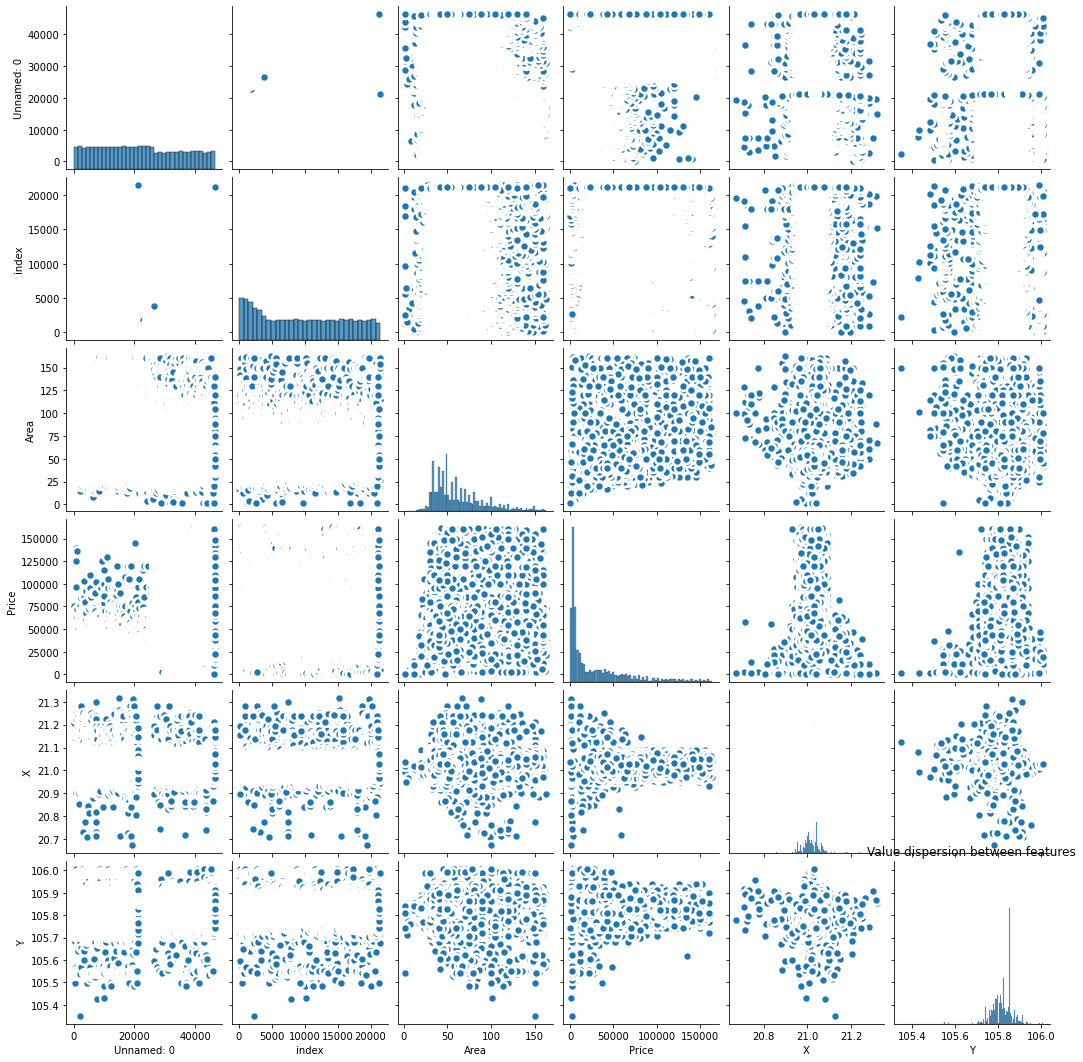

In [230]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(dataframe, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.title('Value dispersion between features')
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-231-42cb866b16db>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(house_price['HouseDirection'], rotation=60, horizontalalignment= 'right')


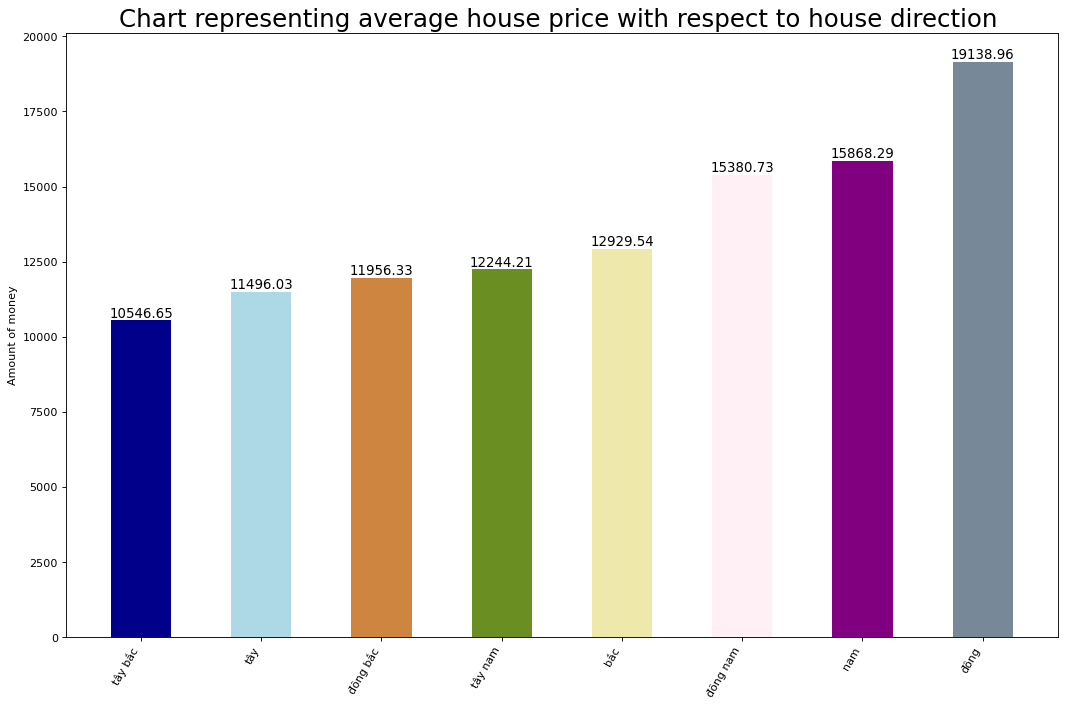

In [231]:
house_price = dataframe[dataframe['HouseDirection']!='None']
house_price = house_price.groupby('HouseDirection')['Price'].mean().reset_index(name='Amount of money')
house_price = house_price.sort_values(by = 'Amount of money') 
house_price['Amount of money'] = house_price['Amount of money'].apply(lambda x : round(x, 2))
n = house_price['HouseDirection'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(house_price['HouseDirection'], house_price['Amount of money'], color=c, width=.5)
for i, val in enumerate(house_price['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.gca().set_xticklabels(house_price['HouseDirection'], rotation=60, horizontalalignment= 'right')
plt.title("Chart representing average house price with respect to house direction ", fontsize=22)
plt.ylabel('Amount of money')
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-232-a879a9f29f55>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(balcony_price['BalconyDirection'], rotation=60, horizontalalignment= 'right')


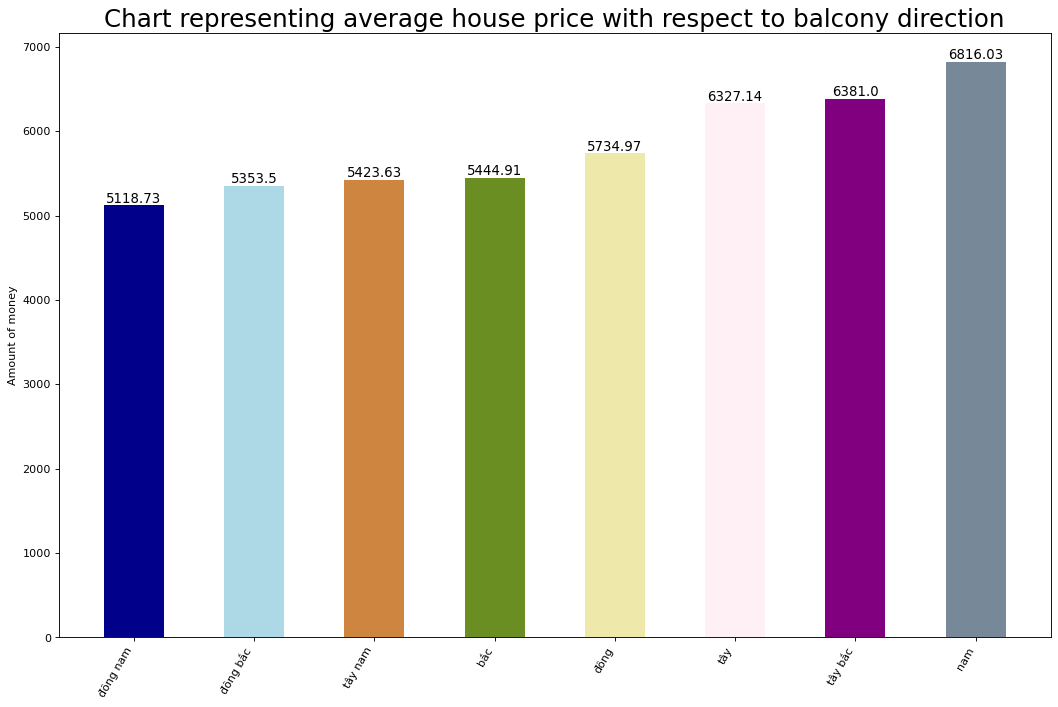

In [232]:
balcony_price = dataframe[dataframe['BalconyDirection']!='None']
balcony_price = balcony_price.groupby('BalconyDirection')['Price'].mean().reset_index(name='Amount of money')
balcony_price = balcony_price.sort_values(by = 'Amount of money') 
balcony_price['Amount of money'] = balcony_price['Amount of money'].apply(lambda x : round(x, 2))
n = balcony_price['BalconyDirection'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(balcony_price['BalconyDirection'], balcony_price['Amount of money'], color=c, width=.5)
for i, val in enumerate(balcony_price['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(balcony_price['BalconyDirection'], rotation=60, horizontalalignment= 'right')
plt.title("Chart representing average house price with respect to balcony direction", fontsize=22)
plt.ylabel('Amount of money')
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2919: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'hig

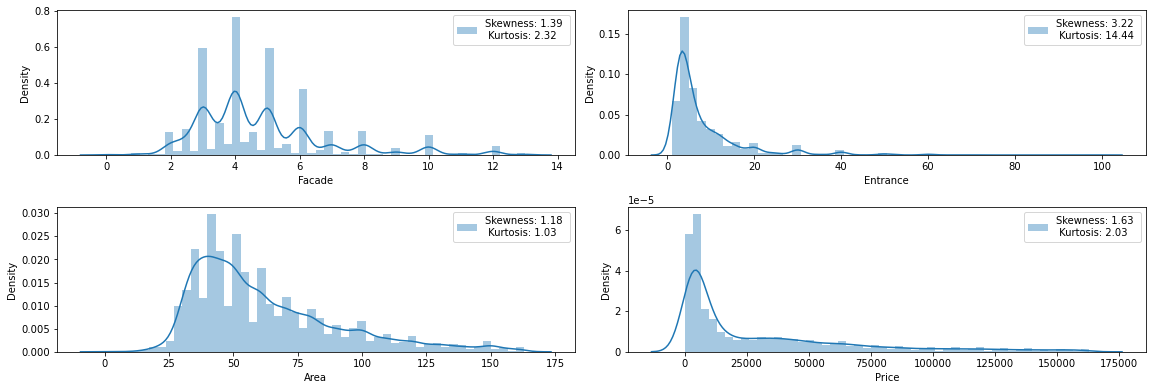

In [233]:
fig = plt.figure(figsize=(16,16))
for index, col in enumerate(['Facade', 'Entrance', 'Area', 'Price']):
    plt.subplot(6,2,index+1)
    t = sns.distplot(dataframe[dataframe[col] != 'None'].loc[:,col], label="Skewness: %.2f \n Kurtosis: %.2f" %(dataframe[dataframe[col] != 'None'].loc[:, col].skew(), dataframe[dataframe[col] != 'None'].loc[:, col].kurt()))
    t.legend()
fig.tight_layout(pad=1.0);

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


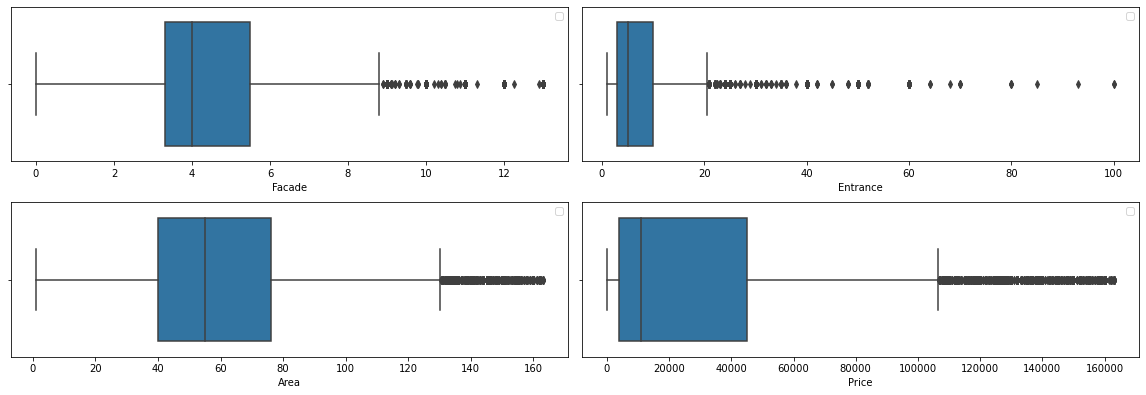

In [234]:
fig = plt.figure(figsize=(16,16))
for index, col in enumerate(['Facade', 'Entrance', 'Area', 'Price']):
    plt.subplot(6,2,index+1)
    t = sns.boxplot(x = dataframe[dataframe[col] != 'None'][col])
    t.legend()
fig.tight_layout(pad=1.0);